In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import math 

df = pd.read_csv('./X_train.csv', error_bad_lines=False, sep=',')
#df = df.drop(df.columns[[0, 1]], axis = 1)
prdct = df['MQT1_category']
y_train = prdct

In [24]:
dft = pd.read_csv('./X_test.csv', error_bad_lines=False, sep = ',')
dft['MQT1_category'].value_counts()

3.0    106
4.0     48
5.0     37
1.0     30
2.0     21
Name: MQT1_category, dtype: int64

In [25]:
prdct_t = dft['MQT1_category']
y_test = prdct_t
dft.drop('MQT1_category', axis = 1, inplace = True)
X_test = dft
X_test.shape, y_test.shape

((242, 129), (242,))

In [26]:
correlationMQ1 = df.corr()['MQT1_category'].abs().sort_values(ascending = False)
correlationMQ1

MQT1_category                   1.000000
veel_leeftijdsgenoten           0.159286
sportmogelijkheden_buurt        0.152230
postcode_cijfers                0.145996
Respondentnummer                0.140750
                                  ...   
8. Bal schoppen                 0.003242
cult_achtergrond_partner        0.001096
fietsen_zonder_zijwielen_mnd    0.000970
zelf_kruipen_mnd                0.000779
Lengte (in m)                        NaN
Name: MQT1_category, Length: 130, dtype: float64

In [27]:
df.drop('MQT1_category', axis = 1, inplace = True)
df

,Respondentnummer,Gender,Geboortedatum,Age on testday (t0),Lengte (afgerond op 0.1 cm),Gewicht (afgerond op 0.1 kg),Lengte (in m),Gymles,Zwemles J/N,Zwemles,...,belonen_wanneer_rustig,buitenspeel_materiaal_beschikbaar,tv_bezighouden,niet_buiten_verkeersveiligheid,niet_buiten_criminaliteit,toestaan_langetijd_schermen,Zip-code school,MQT0_category,BMI_category,Age differents
0,0.960157,0.0,0.025735,0.666667,0.473684,0.380952,0.0,0.75,0.0,1.00,...,0.50,1.0,0.50,0.25,0.50,0.50,0.348436,0.25,0.0,0.0
1,0.985381,0.0,0.045956,0.666667,0.421053,0.285714,0.0,0.75,0.0,0.50,...,0.25,1.0,0.50,0.00,0.00,0.50,0.348436,0.50,0.0,0.5
2,0.980116,1.0,0.625000,0.333333,0.500000,0.476190,0.0,1.00,1.0,1.00,...,0.50,1.0,0.25,0.00,0.00,0.50,0.348436,1.00,0.0,0.5
3,0.980270,1.0,0.544118,0.333333,0.394737,0.285714,0.0,1.00,1.0,1.00,...,0.25,1.0,0.50,0.00,0.00,0.50,0.348436,0.25,0.0,0.0
4,0.970199,0.0,0.759191,0.666667,0.578947,0.380952,0.0,1.00,0.0,0.75,...,0.00,1.0,0.50,0.00,0.00,0.25,0.348436,0.75,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,0.955445,0.0,0.262868,0.666667,0.736842,0.571429,0.0,1.00,0.0,1.00,...,0.50,1.0,0.00,0.00,0.00,0.25,0.348436,0.75,0.0,0.0
1571,0.995362,1.0,0.104779,0.666667,0.368421,0.238095,0.0,1.00,0.0,1.00,...,0.25,1.0,0.25,0.00,0.00,0.50,0.348436,0.50,0.0,0.5
1572,0.995138,1.0,0.619485,0.000000,0.210526,0.190476,0.0,1.00,1.0,1.00,...,0.00,1.0,1.00,1.00,1.00,0.75,0.348436,0.50,0.0,0.0
1573,0.497472,1.0,0.551471,1.000000,0.552632,0.523810,0.0,0.75,0.0,0.50,...,0.75,1.0,0.75,0.25,0.25,0.75,0.331176,0.25,0.5,0.5


In [28]:
X_train = df

X_train.shape, y_train.shape

((1575, 129), (1575,))

In [29]:
# Use the model classifier to fit data:
model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1)
model.fit(X_train, y_train)

# Predict y data with classifier: 
y_predict = model.predict(X_test)

model.score(X_test, y_test)

print(' training score: {}'.format(model.score(X_train, y_train)))
print(' testing score: {}'.format(model.score(X_test, y_test)))

acc_rd_clf = accuracy_score(y_test, y_predict)
conf = confusion_matrix(y_test, y_predict)
clf_report = classification_report(y_test, y_predict)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

 training score: 0.9917460317460317
 testing score: 0.39669421487603307
Accuracy Score of Random Forest is : 0.39669421487603307
Confusion Matrix : 
[[10  1 14  3  2]
 [ 4  0 16  0  1]
 [ 9  3 77  9  8]
 [ 5  1 33  4  5]
 [ 2  0 23  7  5]]
Classification Report : 
              precision    recall  f1-score   support

         1.0       0.33      0.33      0.33        30
         2.0       0.00      0.00      0.00        21
         3.0       0.47      0.73      0.57       106
         4.0       0.17      0.08      0.11        48
         5.0       0.24      0.14      0.17        37

    accuracy                           0.40       242
   macro avg       0.24      0.26      0.24       242
weighted avg       0.32      0.40      0.34       242



/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


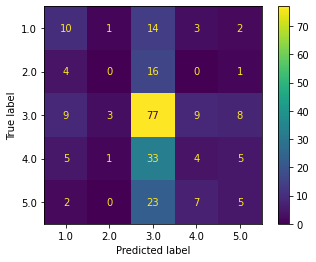

In [30]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [31]:
X_test['Predicted_MQT1_category'] = y_predict
X_test

,Respondentnummer,Gender,Geboortedatum,Age on testday (t0),Lengte (afgerond op 0.1 cm),Gewicht (afgerond op 0.1 kg),Lengte (in m),Gymles,Zwemles J/N,Zwemles,...,buitenspeel_materiaal_beschikbaar,tv_bezighouden,niet_buiten_verkeersveiligheid,niet_buiten_criminaliteit,toestaan_langetijd_schermen,Zip-code school,MQT0_category,BMI_category,Age differents,Predicted_MQT1_category
0,0.985241,0.0,0.325368,0.666667,0.736842,0.523810,0.0,1.00,0.0,0.75,...,0.75,0.50,0.00,0.00,0.50,0.348436,1.00,0.0,0.5,3.0
1,0.994969,0.0,0.738971,0.000000,0.342105,0.190476,0.0,1.00,0.0,0.00,...,1.00,0.50,0.50,0.00,0.50,0.348436,0.50,0.0,0.0,2.0
2,0.457714,0.0,0.444853,0.666667,0.500000,0.428571,0.0,1.00,0.0,0.50,...,0.75,0.50,0.25,0.00,0.25,0.961165,0.25,0.0,0.5,3.0
3,0.970134,0.0,0.071691,0.666667,0.578947,0.285714,0.0,1.00,0.0,0.75,...,0.75,0.50,0.25,0.00,0.25,0.348436,0.50,0.0,0.5,3.0
4,0.547451,1.0,0.341912,0.666667,0.605263,0.333333,0.0,1.00,1.0,1.00,...,0.75,0.25,0.25,0.25,0.25,0.282632,1.00,0.0,0.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.995357,1.0,0.509191,0.333333,0.421053,0.333333,0.0,1.00,0.0,0.50,...,1.00,0.25,0.50,0.25,0.25,0.348436,0.50,0.0,0.0,1.0
238,0.970174,1.0,0.301471,0.000000,0.315789,0.142857,0.0,1.00,0.0,1.00,...,1.00,0.00,0.50,0.50,0.00,0.348436,0.50,0.0,0.0,3.0
239,0.527383,1.0,0.689338,0.666667,0.526316,0.333333,0.0,1.00,0.0,1.00,...,0.75,0.25,0.75,0.25,0.00,0.000000,0.25,0.0,0.5,3.0
240,0.955236,0.0,0.663603,0.666667,0.500000,0.285714,0.0,1.00,0.0,1.00,...,1.00,0.50,0.00,0.00,0.25,0.348436,0.50,0.0,0.5,4.0


In [32]:
CMQT1_predicted = X_test.corr()['Predicted_MQT1_category'].abs().sort_values(ascending = False)
CMQT1_predicted

Predicted_MQT1_category     1.000000e+00
postcode_cijfers            3.073343e-01
Respondentnummer            2.913216e-01
drukte_buurt                2.361650e-01
Age on testday (t0)         1.926502e-01
                                ...     
invul_vragenlijst           6.258325e-17
niet_actief_speelplekken    2.446960e-17
aantal_dagen_zwemles        1.053291e-17
lid_sportvereniging         2.818791e-18
Lengte (in m)                        NaN
Name: Predicted_MQT1_category, Length: 130, dtype: float64

In [33]:
print(RandomForestClassifier._estimator_type)

classifier


In [34]:
print(len(X_test.columns))
print(len(X_train.columns))
print(len(X_test.index))
print(len(X_train.index))


130
129
242
1575


In [43]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

X_train = pd.read_csv('X_train.csv', error_bad_lines=False, sep=',')
y_train = X_train['MQT1_category']
X_train.drop('MQT1_category', axis = 1, inplace = True)


X_test = pd.read_csv('X_test.csv', error_bad_lines=False, sep = ',')
y_test = X_test['MQT1_category']
X_test.drop('MQT1_category', axis = 1, inplace = True)

# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
grid_values = {'n_estimators': [50]}
grid_clf_acc = GridSearchCV(model, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

# Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics
# print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred_acc)))
# print('Precision Score : ' + str(precision_score(y_test, y_pred_acc)))
# print('Recall Score : ' + str(recall_score(y_test, y_pred_acc)))
# print('F1 Score : ' + str(f1_score(y_test, y_pred_acc)))

# Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test, y_pred_acc)

print('training score: {}'.format(model.score(X_train, y_train)))
print(' testing score: {}'.format(model.score(X_test, y_test)))

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1872, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classifi

training score: 0.9917460317460317
 testing score: 0.39669421487603307
